# Exercise_LGD_R.R

The R script provided performs various statistical analyses on loan data, focusing on the Loss Given Default (LGD) variable. LGD represents the loss severity in the event of default, a critical component in credit risk modeling. Here's a breakdown of the key operations performed in the script:

1. **Data Loading and Inspection**:
   - The script starts by loading a CSV file named `RECOV.csv` into a dataframe called `data`. This file presumably contains recovery data related to loans.
   - It then examines the structure of the data by displaying dimensions, column names, and the first few rows.
   - A histogram of the `LGD` variable is created, although there's a reference to a color `bluemono` that is not predefined in the script, indicating a potential error or missing code for color definition.

2. **Data Preparation (Commented Out)**:
   - There are commented-out lines that seem to indicate an initial intention to filter the `LGD` values to be between 0 and 1 and to define new family distributions, but these lines are not executed.

3. **Model Fitting**:
   - The script fits four different models to the `LGD` data with respect to an explanatory variable `HRATE` (possibly a hazard rate or interest rate):
     - **Model 0 (`m0`)**: A simple Generalized Linear Model (GLM) assuming a Gaussian (normal) distribution.
     - **Model 2 (`m2`)**: A GAMLSS model using the `BEINF()` family, which allows for the modeling of data with boundaries at 0 and 1 (Beta inflated distribution). This model also allows the variance (`sigma`), skewness (`nu`), and kurtosis (`tau`) parameters to vary with `HRATE`.
     - **Model 3 (`m3`)**: Similar to `m2`, but it employs penalized B-splines (`pb()`) for non-linear effects of `HRATE` on all distribution parameters, aiming to capture more complex relationships.
   - An attempt to fit a logistic regression is commented out, which suggests an initial consideration to recode `LGD` into categorical outcomes (0, 1, 2) and fit a multinomial model (`MULTIN()` family in GAMLSS).

4. **Model Evaluation**:
   - The script plots the fitted models (`m0`, `m1`, `m2`, `m3`) to visually assess their fit. However, `m1` is mentioned without being defined earlier in the script, indicating either an error or that part of the code might have been removed or commented out.

This script demonstrates an approach to analyzing LGD data using both simple and complex modeling techniques to understand the relationship between LGD and other variables (like `HRATE`). The use of GAMLSS for fitting distributions that are bounded at 0 and 1, and the exploration of non-linear effects with penalized B-splines, are advanced techniques suitable for financial data with complex underlying patterns.

In [2]:
library(gam)
library(gamlss)

[1] 999   2

[1] "LGD"   "HRATE"

,LGD,HRATE
,<dbl>,<dbl>
1,0.06647987,0.5358162
2,0.79296319,0.3651047
3,0.04210040,0.3345588
4,0.05411932,0.5187571
5,1.00000000,0.3403447
6,0.10220911,0.4125057


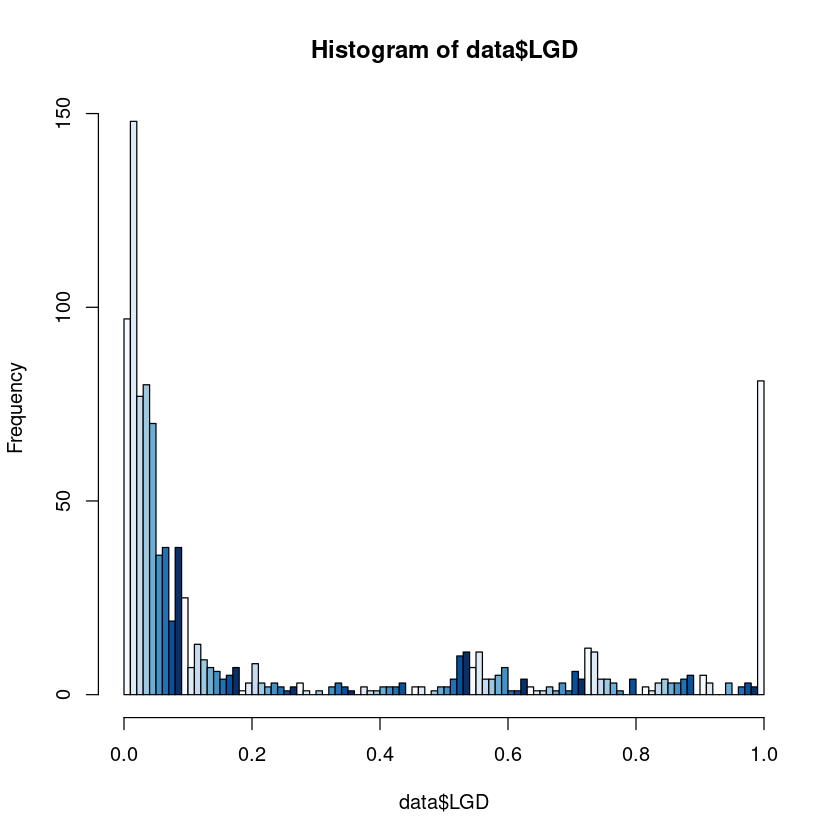

In [3]:
data<-read.csv(file="../data/RECOV.csv", header = TRUE, sep = ',')

dim(data)
names(data)
head(data)
hist(data$LGD, breaks = 100, col=blues9)
#data$LGD <- data[data$LGD > 0 & data$LGD < 1]

In [11]:
#gen.Family("BSSN", "logit")
#gen.Inf0to1("logitBSSN","Zero&One")

k1 <-6

m0 <- glm(LGD~HRATE, family= gaussian, data= data)

m2<-gamlss(LGD~HRATE, sigma.formula =~ HRATE, 
           nu.formula =~ HRATE, tau.formula =~ HRATE, family = BEINF(), 
           data=data);

m3 <- gamlss(data$LGD~pb(data$HRATE,method="GAIC", k=k1),
                    sigma.formula=~pb(data$HRATE,method="GAIC", k=k1),
                    nu.formula=~pb(data$HRATE,method="GAIC", k=k1),
                    tau.formula=~pb(data$HRATE,method="GAIC", k=k1),
                    family=BEINF,
                    trace = TRUE);

# fitting a logistic regression:
data$LGD[data$LGD==0] <- 0
data$LGD[data$LGD==1] <- 1
data$LGD[0<data$LGD & data$LGD< 1] <- 2
data$LGD = as.factor(data$LGD);

m1<- gamlss(LGD ~ HRATE, sigma.formula = ~HRATE, family = MULTIN(), data = data);

Warning message in Ops.factor(y, mu):
“‘-’ not meaningful for factors”
Warning message in Ops.factor(eta, offset):
“‘-’ not meaningful for factors”
Warning message in Ops.factor(y, mu):
“‘-’ not meaningful for factors”


ERROR: Error in glm.fit(x = structure(c(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, : NA/NaN/Inf in 'y'


In [6]:
GAIC(m1, m2, m3)

,df,AIC
,<dbl>,<dbl>
m3,8.899744,-584.6320
m2,8.000000,-574.4880
m1,4.000000,749.9849


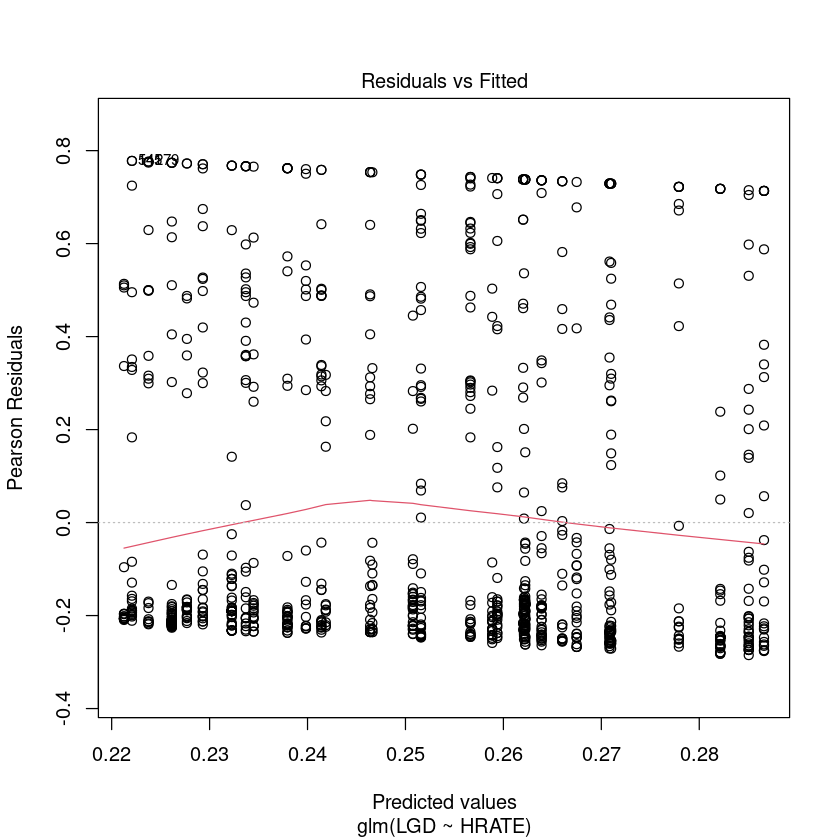

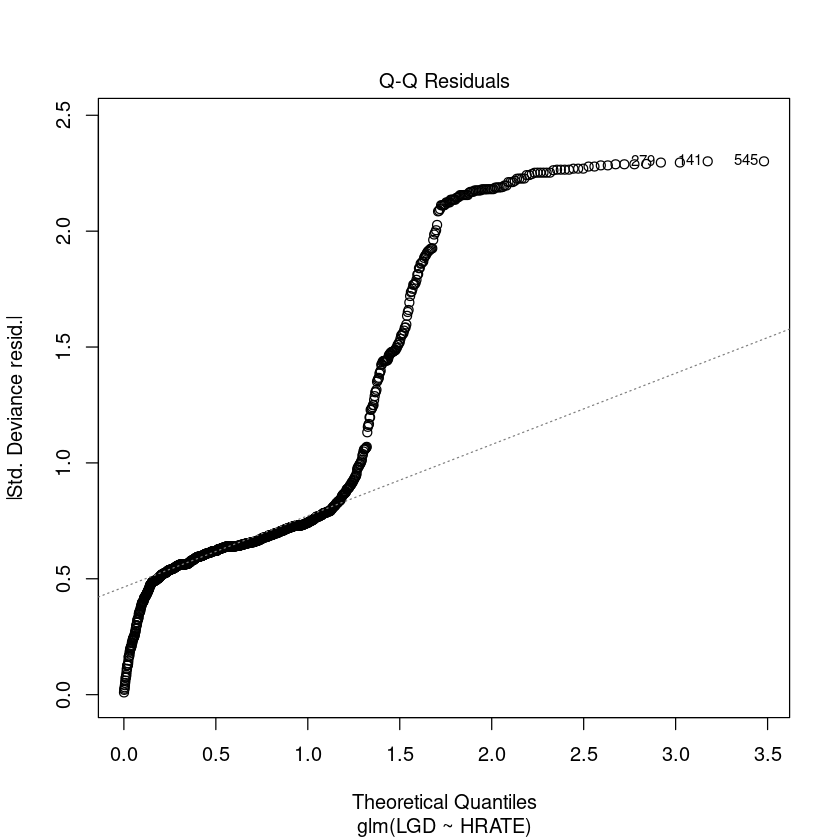

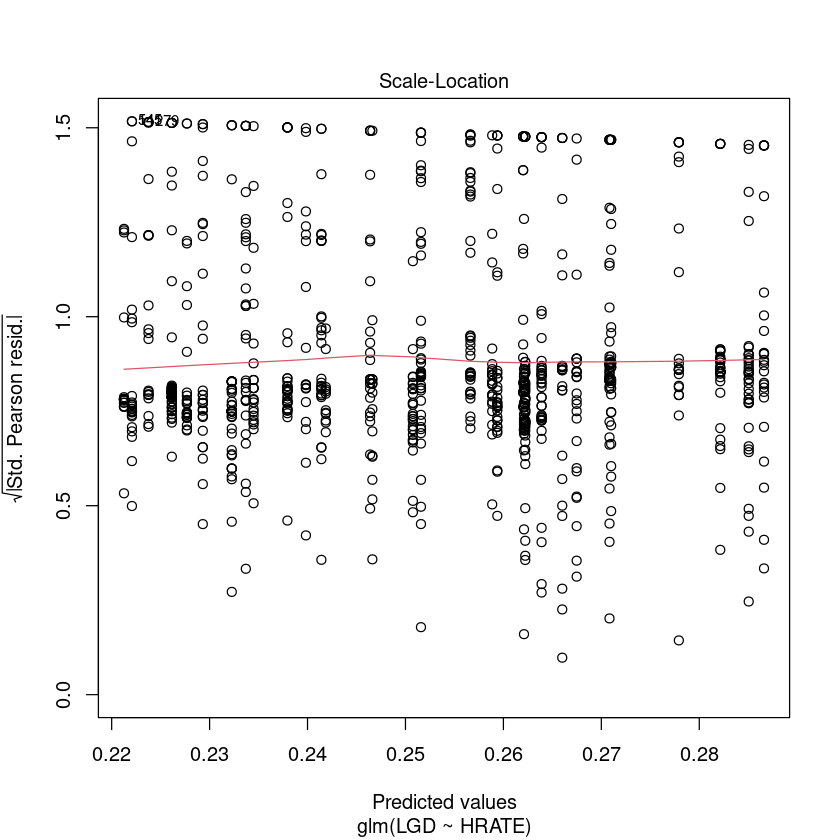

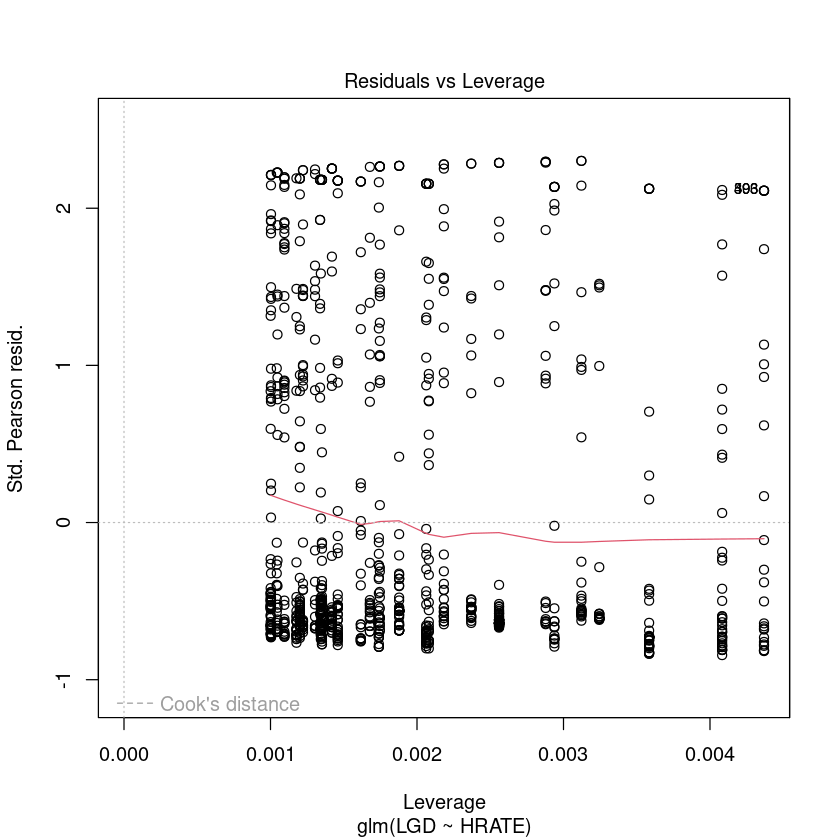

In [7]:
plot(m0)

******************************************************************
	 Summary of the Randomised Quantile Residuals
                           mean   =  0.005835074 
                       variance   =  0.9611565 
               coef. of skewness  =  -0.04582259 
               coef. of kurtosis  =  3.361332 
Filliben correlation coefficient  =  0.9985825 
******************************************************************


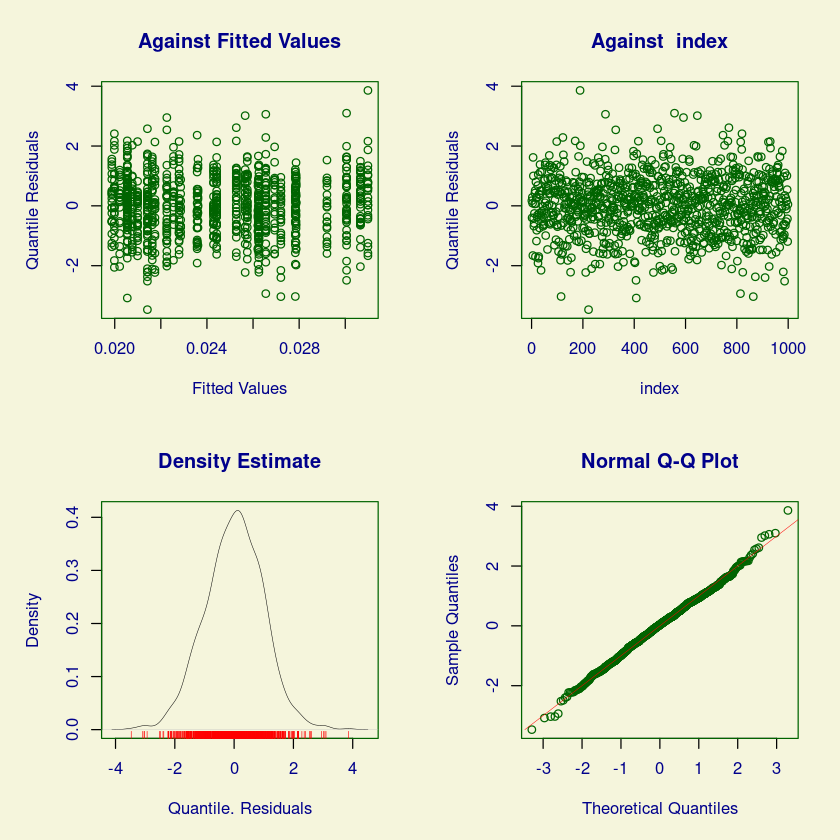

In [8]:
plot(m1)

******************************************************************
	 Summary of the Randomised Quantile Residuals
                           mean   =  -0.08050882 
                       variance   =  0.9183309 
               coef. of skewness  =  0.6490177 
               coef. of kurtosis  =  3.208628 
Filliben correlation coefficient  =  0.954027 
******************************************************************


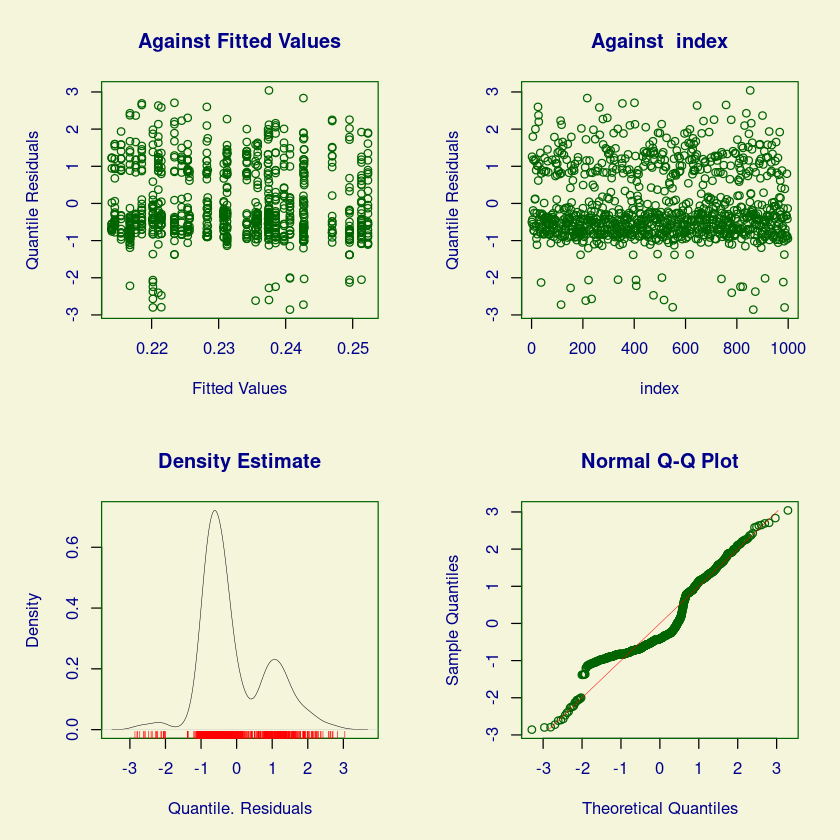

In [9]:
plot(m2)

******************************************************************
	 Summary of the Randomised Quantile Residuals
                           mean   =  -0.08838525 
                       variance   =  0.8880479 
               coef. of skewness  =  0.6245629 
               coef. of kurtosis  =  3.150072 
Filliben correlation coefficient  =  0.9540672 
******************************************************************


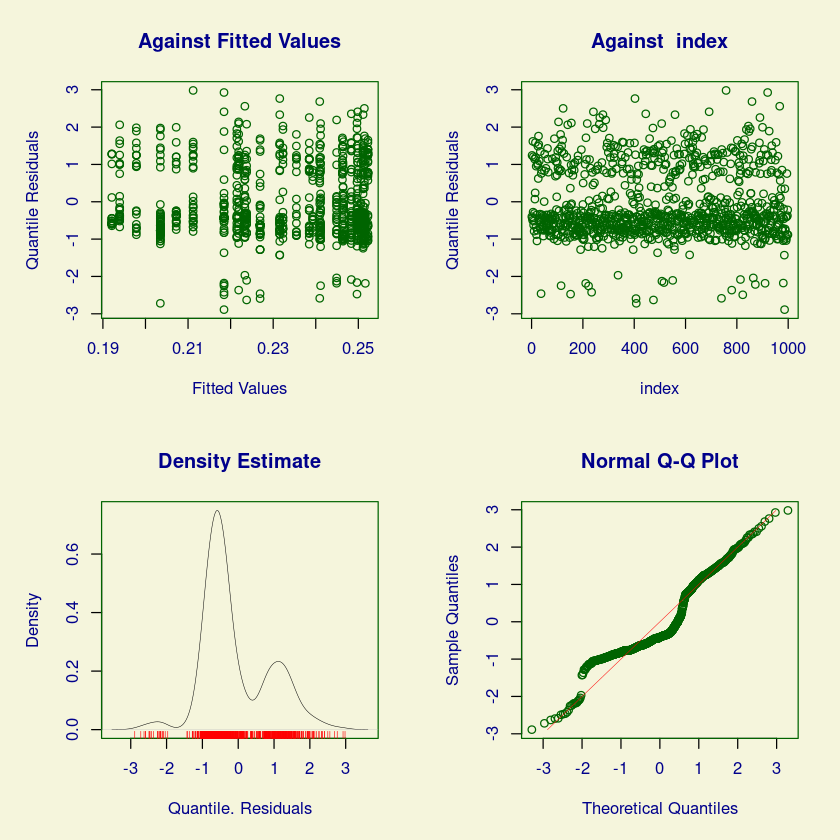

In [10]:
plot(m3)